In [1]:
#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sb
%config InlineBackend.figure_format ='retina'   # Plots de alta resolução
import datetime as dt
from datetime import timedelta
import math

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importando os dados e criando o dataframe até agosto 2022
jan22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/16549843-e49f-4773-a2e5-c45fcebcd6af/download/arr_202201.csv'
fev22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/a604e278-2933-40f7-a13a-ad47514073f7/download/arr_202202.csv'
mar22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/0d01f72f-8b37-4058-b26b-13b8e16621b7/download/arr_202203.csv'
abr22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/86289c18-3664-4e29-bb61-3136f3dc3375/download/arr_202204.csv'
mai22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/35614c13-ae81-427e-8950-69656cab140f/download/arr_202205.csv'
jun22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/d03034e5-5358-450b-9458-5ea19a8691ce/download/arr_202206.csv'
jul22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/bba8e11b-7e39-446c-afb9-5f4796512ac1/download/arr_202207.csv'
ago22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/df79dea2-acc8-46d1-8cc1-004b21b939af/download/arr_202208.csv'
set22 = 'https://dadosabertos.go.gov.br/dataset/d579601c-6971-4684-a89b-ebce7a1fa994/resource/3bd8a992-8502-4ef2-a4e4-b6f7d93d5957/download/arr_202209.csv'

In [4]:
def criardf(mes):
    df = pd.read_csv(mes, sep=';')
    
    #TRANSFORMANDO OS DADOS DE ANO_MES EM STRING
    df['ANO_MES'] = df['ANO_MES'].astype(str)
    
    #TRANSFORMANDO OS DADOS DE VALR_TOTAL TROCANDO ',' POR '.'
    df['VALR_TOTAL']= df['VALR_TOTAL'].replace(',','.',regex=True)
    
    #TRANSFORMANDO OS DADOS DE VALR_TOTAL PARA NUMÉRICO
    df['VALR_TOTAL'] = df['VALR_TOTAL'].astype(float)
    
    #CRIANDO A COLUNA VALR_MILHOES PARA VISUALIZAR MELHOR OS DADOS
    df['VALR_MILHOES'] = df.apply(lambda row: round(row.VALR_TOTAL * 0.000001,2), axis = 1)
    
    df['ANO_MES'] = df['ANO_MES'].map({'202201':'2022-01',
                                     '202202':'2022-02',
                                     '202203':'2022-03',
                                      '202204':'2022-04',
                                      '202205':'2022-05',
                                      '202206':'2022-06',
                                      '202207':'2022-07',
                                      '202208':'2022-08',
                                      '202209':'2022-09',
                                       '202210':'2022-10',
    },na_action=None)
  
  
    
    return df

In [5]:
temp22 = pd.concat([criardf(jan22), criardf(fev22),criardf(mar22),
                    criardf(abr22),criardf(mai22),criardf(jun22),
                    criardf(jul22),criardf(ago22),criardf(set22)], 
                    ignore_index = True)
temp22.head()

,ANO_MES,TIPO_RECEITA,VALR_TOTAL,VALR_MILHOES
0,2022-01,ICMS,2.070650e+09,2070.65
1,2022-01,IPVA,1.121957e+08,112.20
2,2022-01,ITCD,5.651558e+07,56.52
3,2022-01,OUTRAS RECEITAS,8.782751e+07,87.83
4,2022-01,OUTROS TRIBUTOS,7.470574e+07,74.71


In [6]:
# Transformar coluna "ANO_MES" em datetime
temp22['ANO_MES'] = pd.to_datetime(temp22['ANO_MES'])

# Utilizar tal coluna como o índice das linhas do DataFrame
temp22 = temp22.set_index('ANO_MES')

# Mostrar 5 primeiras linhas para verificar se funcionou
temp22.head()

,TIPO_RECEITA,VALR_TOTAL,VALR_MILHOES
ANO_MES,,,
2022-01-01,ICMS,2.070650e+09,2070.65
2022-01-01,IPVA,1.121957e+08,112.20
2022-01-01,ITCD,5.651558e+07,56.52
2022-01-01,OUTRAS RECEITAS,8.782751e+07,87.83
2022-01-01,OUTROS TRIBUTOS,7.470574e+07,74.71


In [7]:
# Descrever as propriedades estatísticas mais importantes
temp22.describe()

,VALR_TOTAL,VALR_MILHOES
count,5.400000e+01,54.000000
mean,4.206355e+08,420.636481
std,7.432895e+08,743.289768
min,4.282048e+07,42.820000
25%,6.444523e+07,64.442500
50%,9.051844e+07,90.515000
75%,1.551389e+08,155.135000
max,2.192192e+09,2192.190000


In [8]:
#criar dataframe com os valores totais de cada 'TIPO_RECEITA'
df_tiporeceita = pd.DataFrame(temp22.groupby('TIPO_RECEITA')['VALR_MILHOES'].sum())
df_tiporeceita

,VALR_MILHOES
TIPO_RECEITA,
ICMS,18562.48
IPVA,1419.43
ITCD,604.46
OUTRAS RECEITAS,943.22
OUTROS TRIBUTOS,638.33
PROTEGE,546.45


<AxesSubplot:title={'center':'Arrecadação do Estado de Goiás - 2022'}, xlabel='TIPO_RECEITA'>

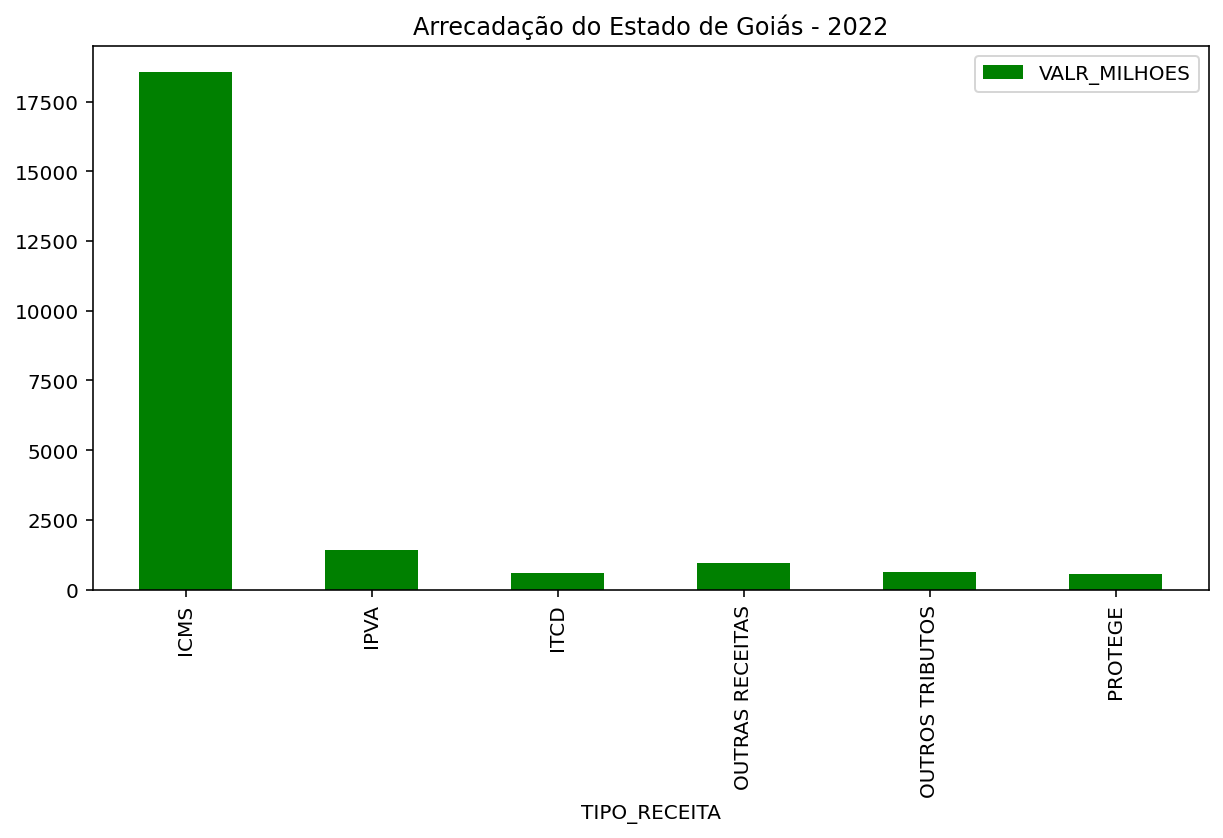

In [9]:
#plotando o gráfico de barras com titulo e legenda
df_tiporeceita.plot(kind='bar', figsize=(10,5), title='Arrecadação do Estado de Goiás - 2022', color='green')
#df_tiporeceita.plot(figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022', color='green');

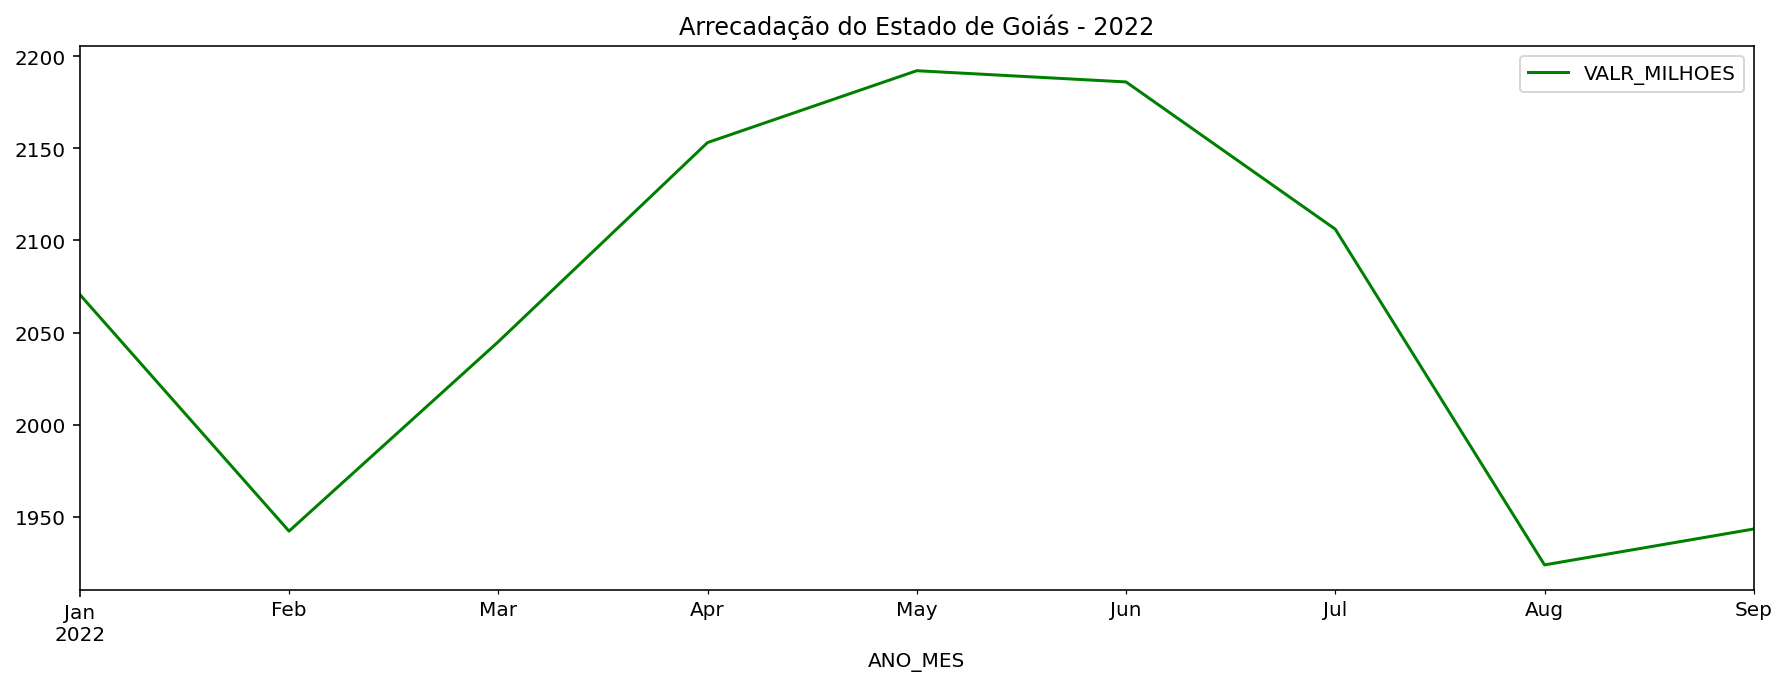

In [10]:
#plotar o gráfico de linha temp22 para cada 'TIPO_RECEITA[ICMS]' x 'VALR_MILHOES' em cada 'ANO_MES'
temp22[temp22['TIPO_RECEITA'] == 'ICMS'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022', color='green');


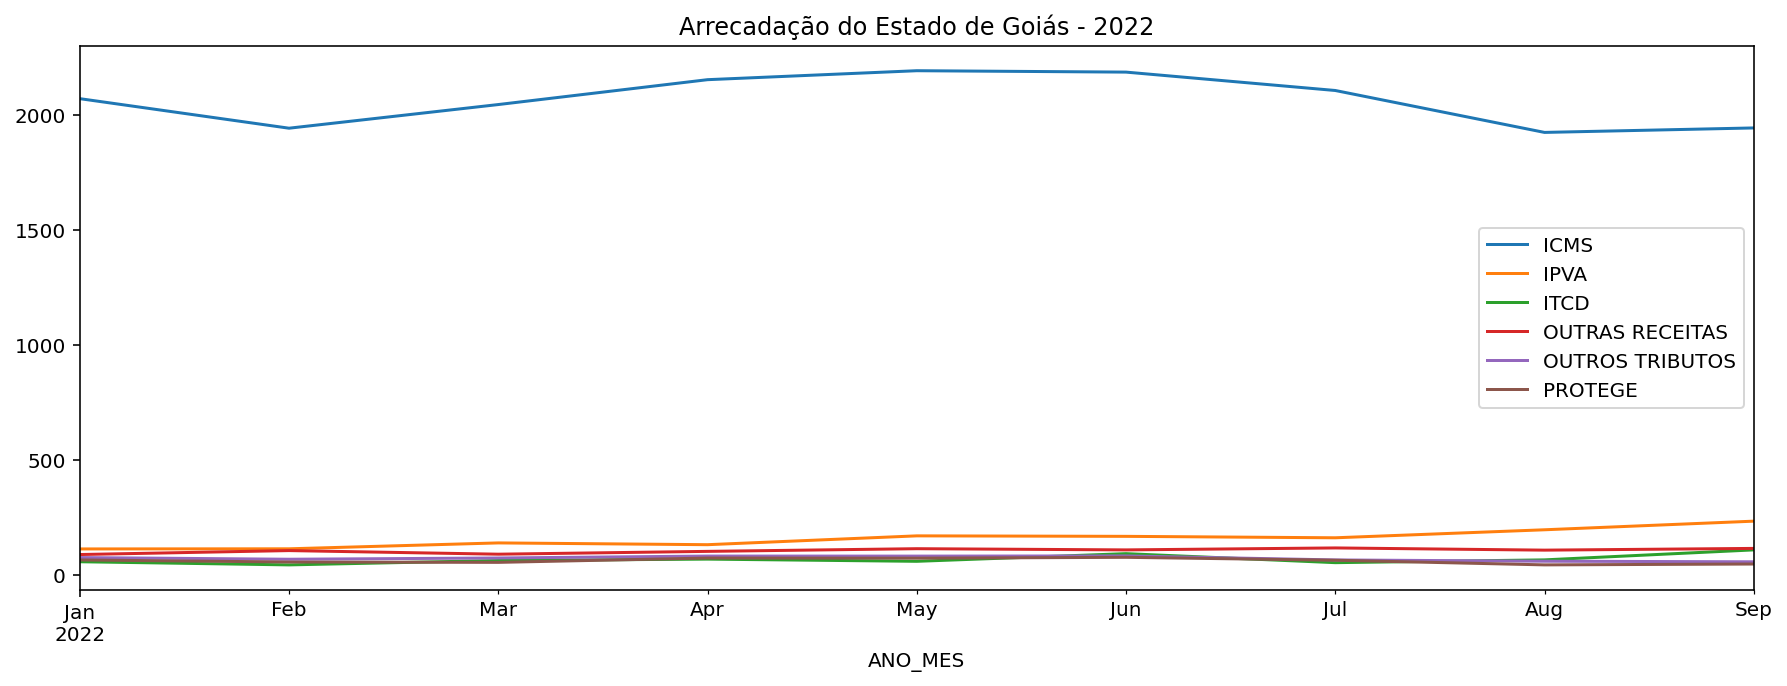

In [11]:
#plotar em gráfico de barras para temp22 para cada 'TIPO_RECEITA' x 'VALR_MILHOES' em cada 'ANO_MES' várias cores

temp22.groupby('TIPO_RECEITA')['VALR_MILHOES'].plot(legend=True, figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022');

#temp22.groupby('TIPO_RECEITA')['VALR_MILHOES'].plot(legend=True, figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022');




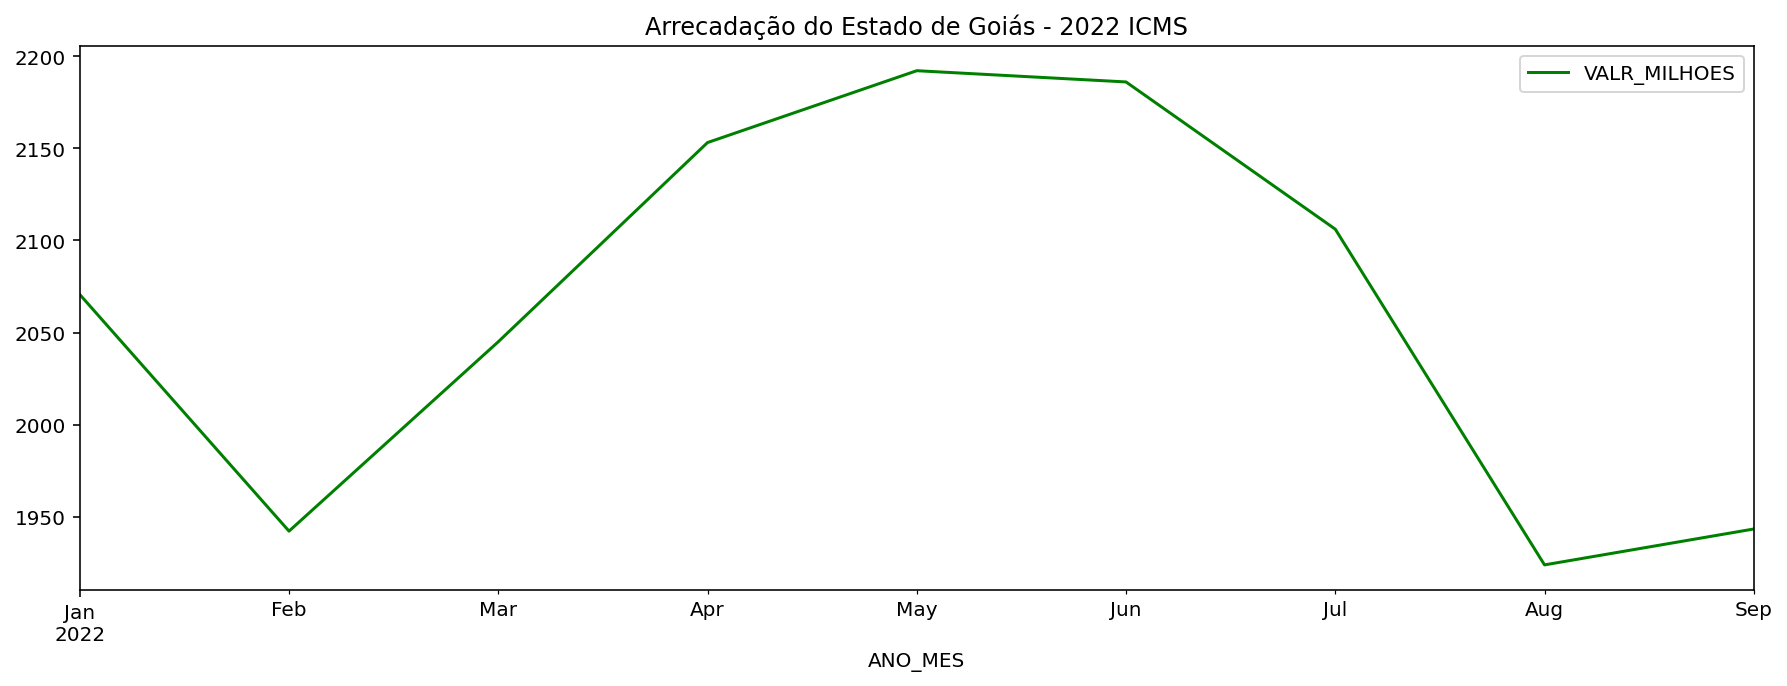

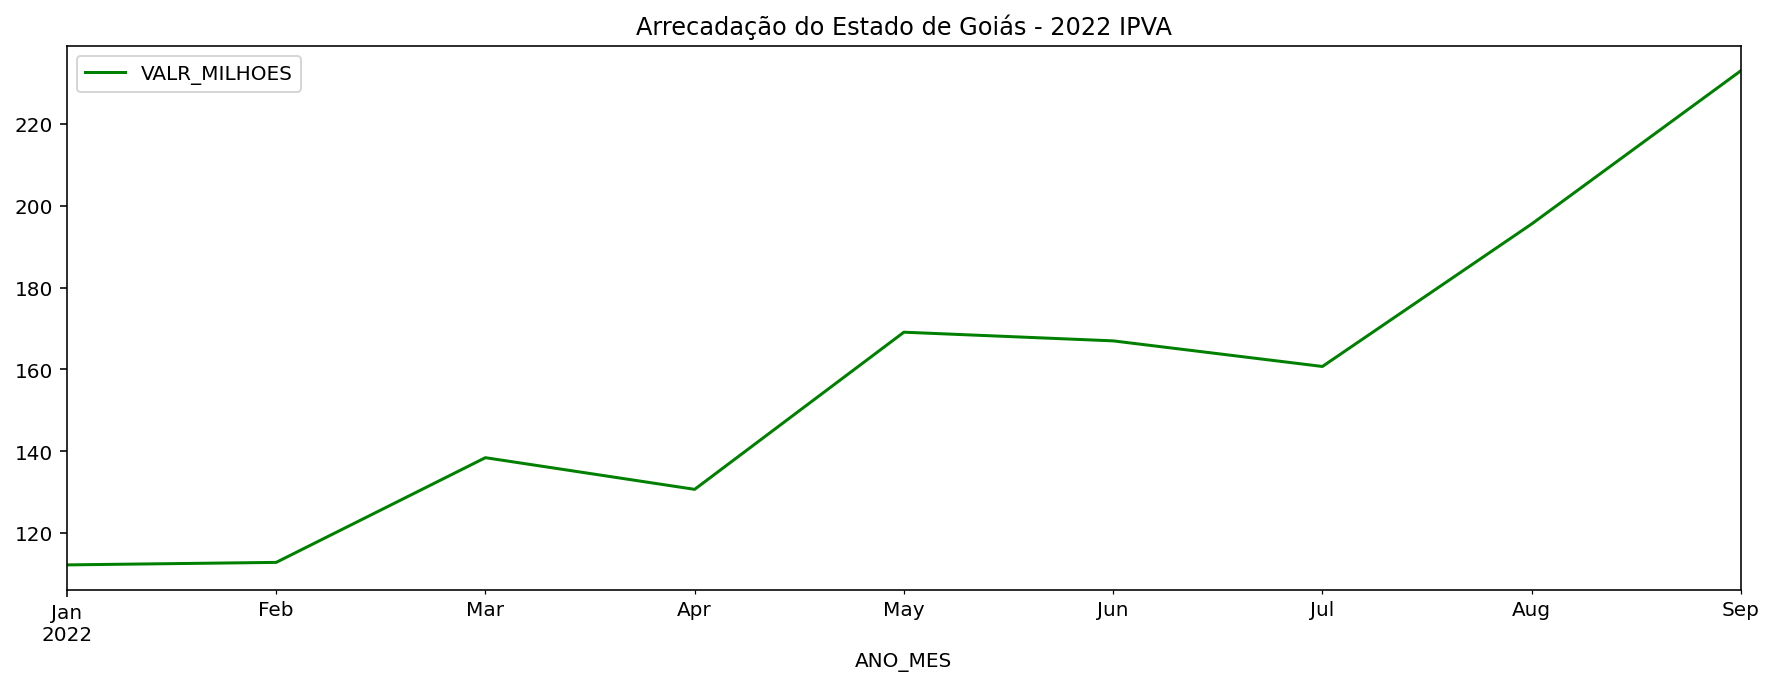

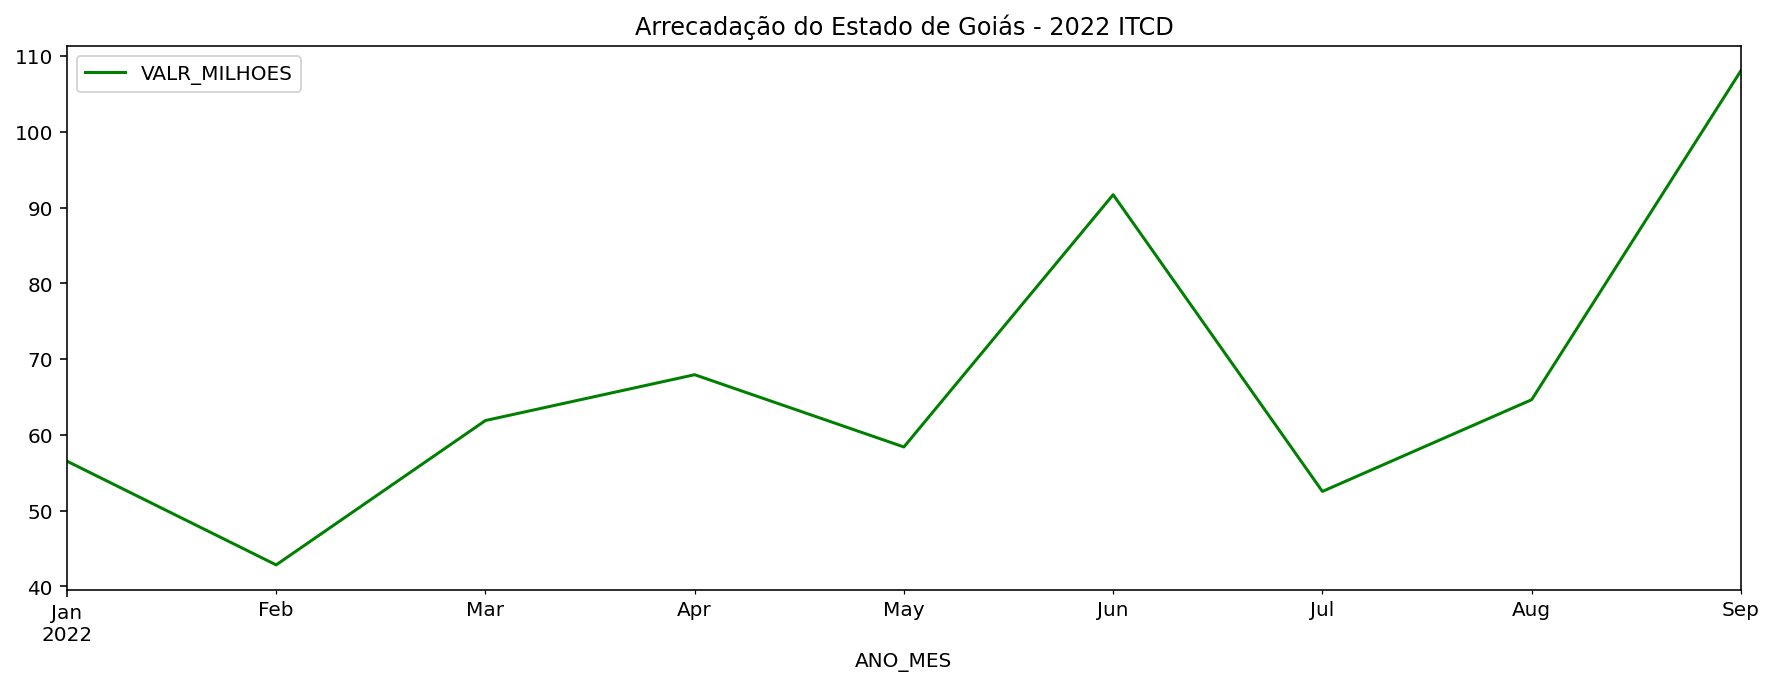

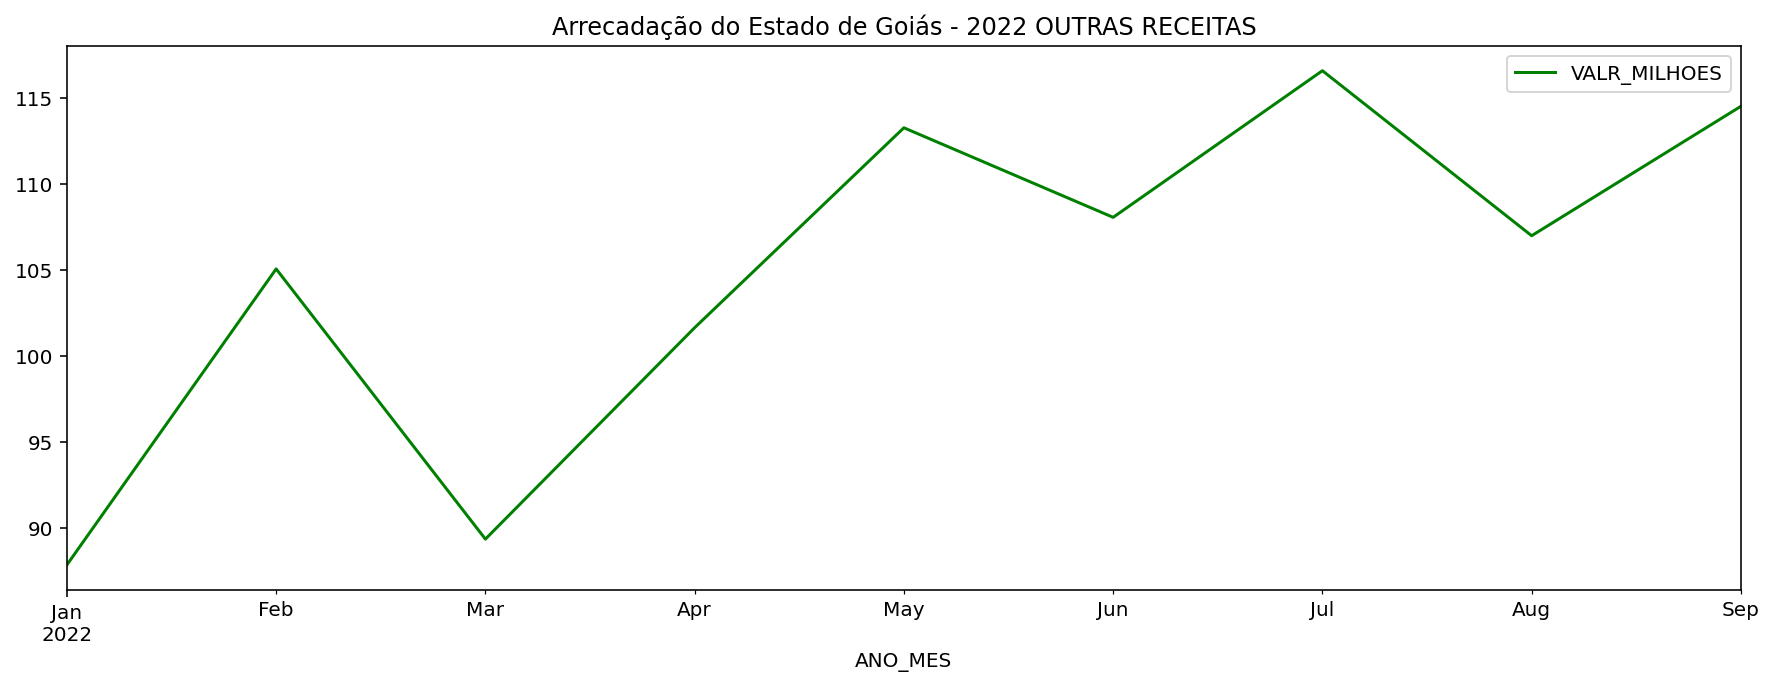

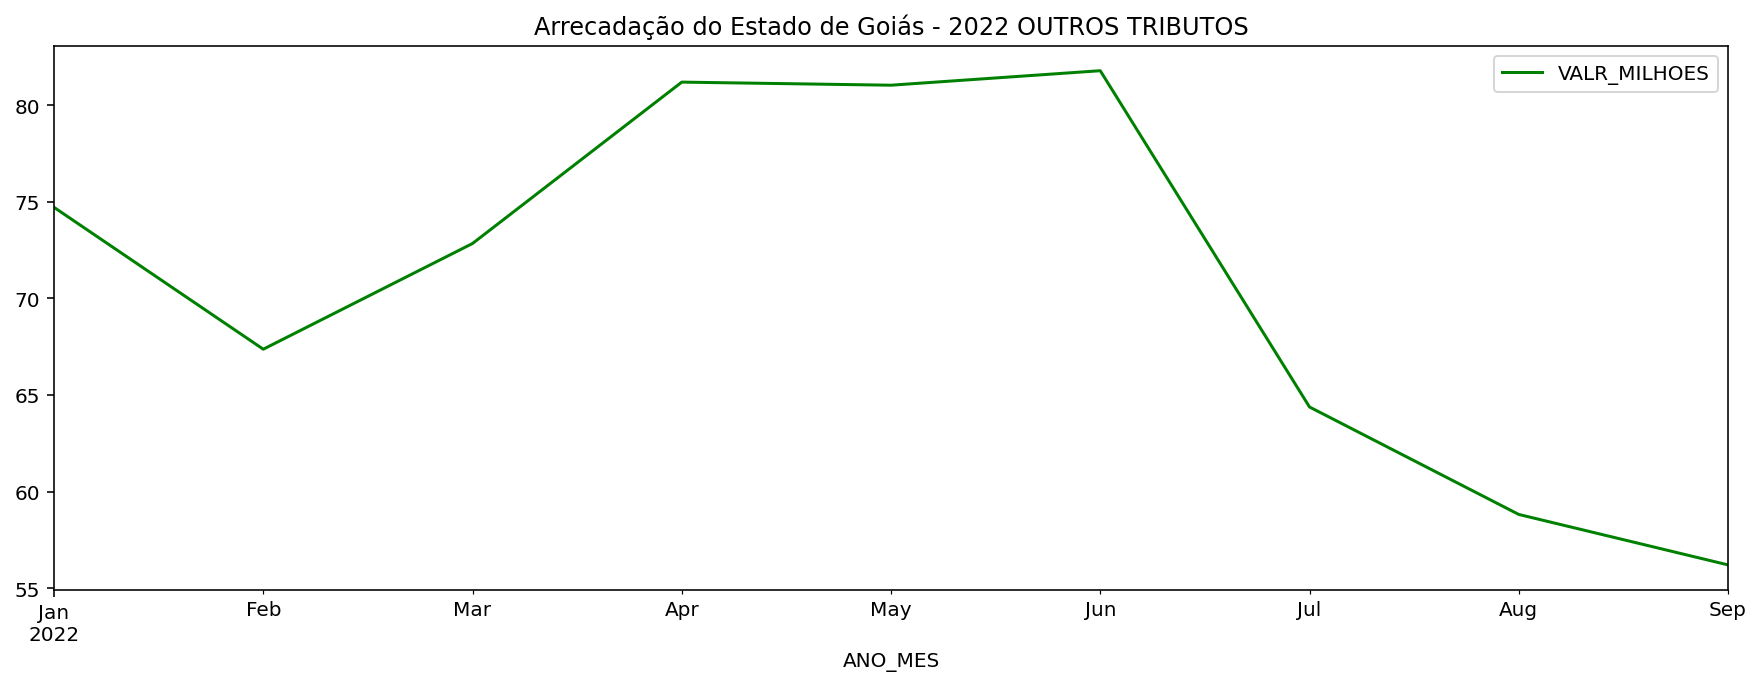

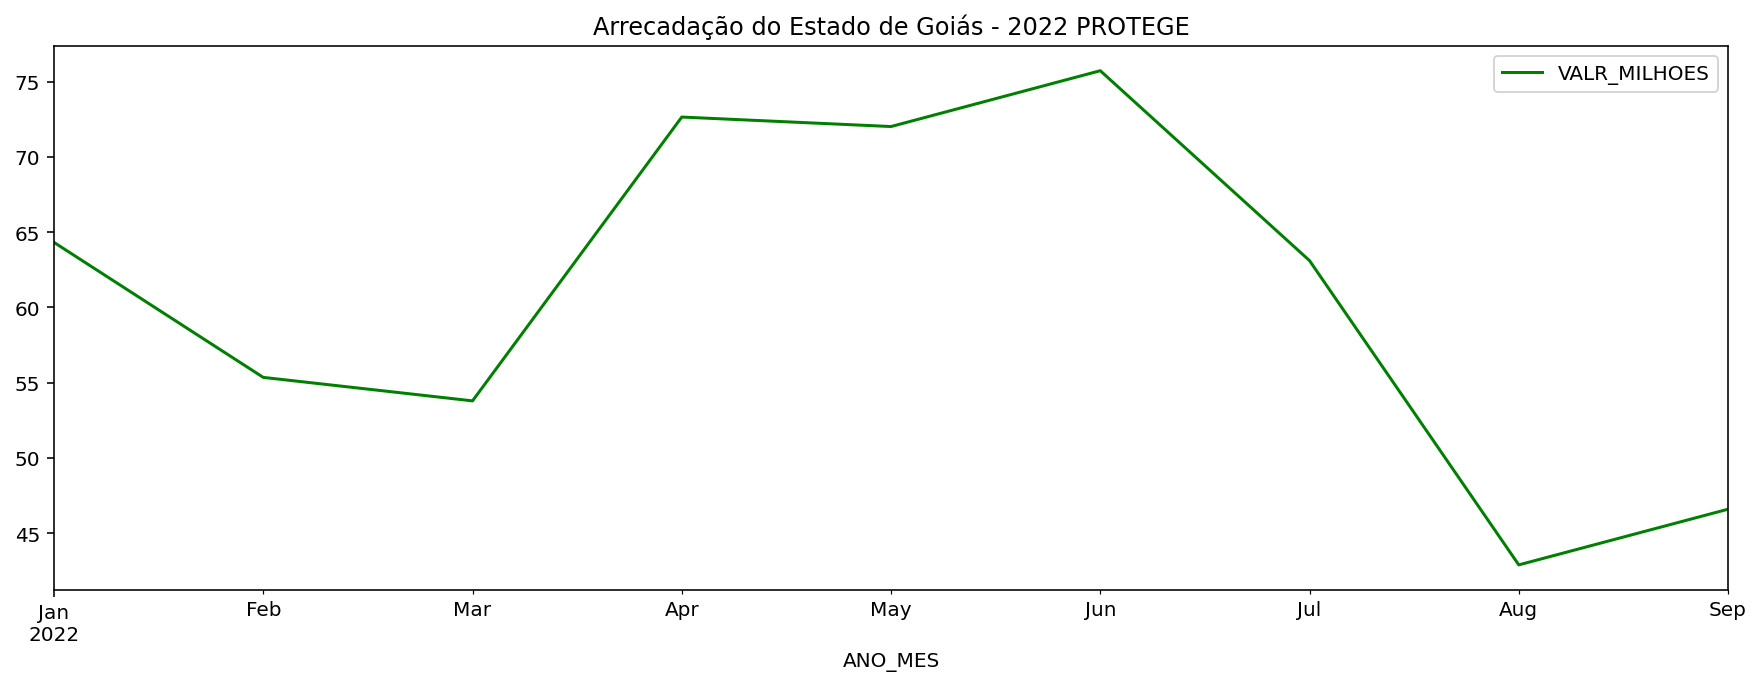

In [67]:
temp22[temp22['TIPO_RECEITA'] == 'ICMS'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022 ICMS', color='green');
temp22[temp22['TIPO_RECEITA'] == 'IPVA'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022 IPVA', color='green');
temp22[temp22['TIPO_RECEITA'] == 'ITCD'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022 ITCD', color='green');
temp22[temp22['TIPO_RECEITA'] == 'OUTRAS RECEITAS'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022 OUTRAS RECEITAS', color='green');
temp22[temp22['TIPO_RECEITA'] == 'OUTROS TRIBUTOS'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022 OUTROS TRIBUTOS', color='green');
temp22[temp22['TIPO_RECEITA'] == 'PROTEGE'].plot(y='VALR_MILHOES', figsize=(15,5), title='Arrecadação do Estado de Goiás - 2022 PROTEGE', color='green');